### Latent Learning

In this module, the agent will first explore the maze for 10 episodes with no task and no rewards. The episode ends if the agent during trial-and-error exploration enters a terminal state.

In [1]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

import utils
from env import Maze
from agent import QAgent, TemporalDifferenceSuccessor
from RL import ReinforcementLearning

%load_ext autoreload
%autoreload 2

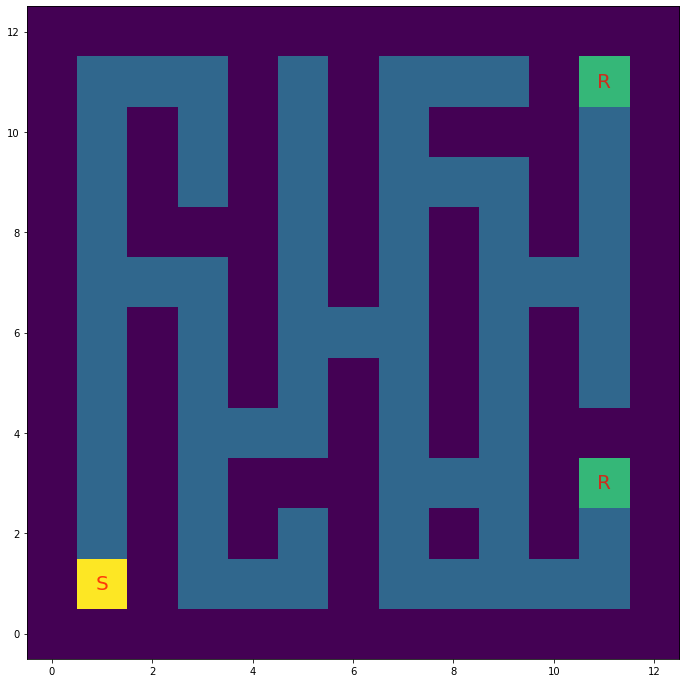

In [2]:
#Load in environment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])


In [3]:
#Set up agent
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.005,
    
}

  0%|          | 0/45 [00:00<?, ?it/s]

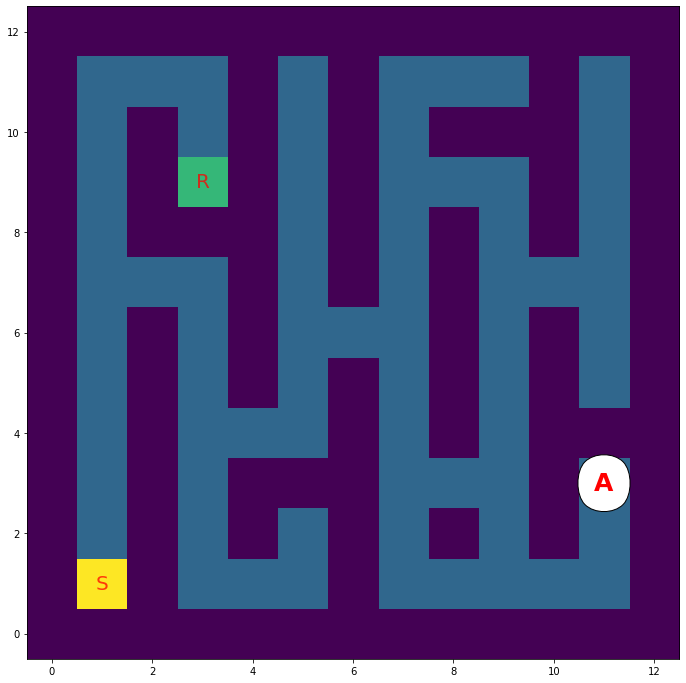

 38%|███▊      | 17/45 [00:06<00:08,  3.48it/s]

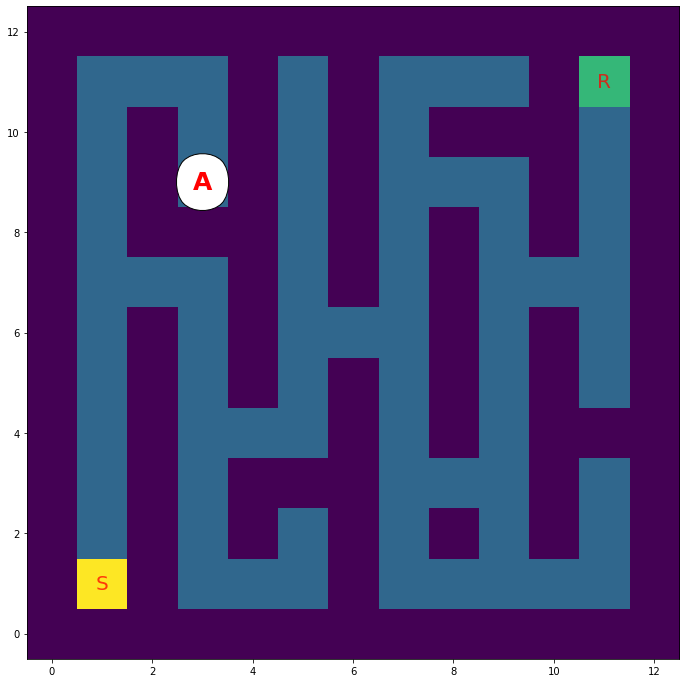

 49%|████▉     | 22/45 [00:09<00:11,  2.02it/s]

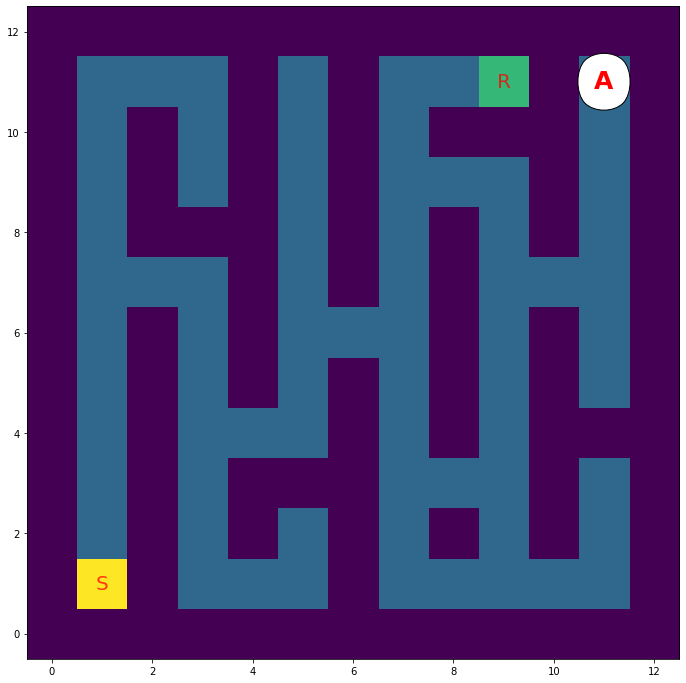

 78%|███████▊  | 35/45 [00:16<00:05,  1.92it/s]

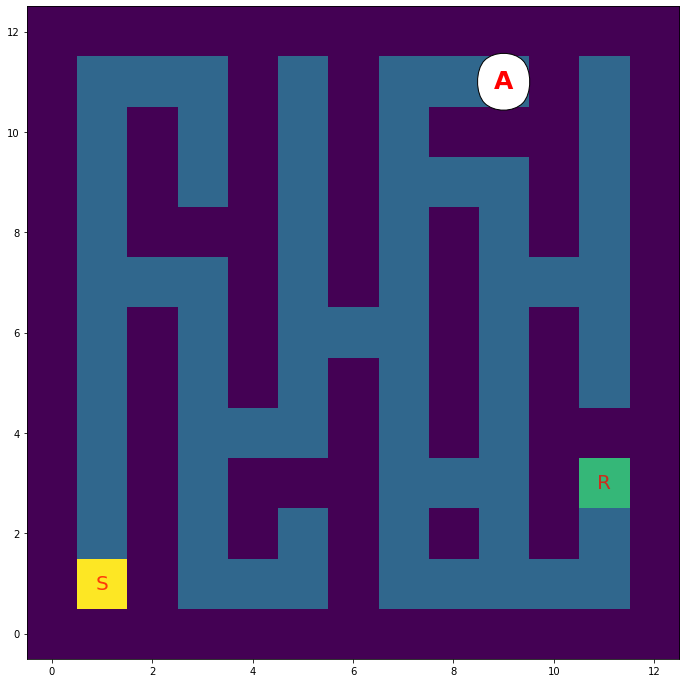

100%|██████████| 45/45 [00:19<00:00,  2.25it/s]


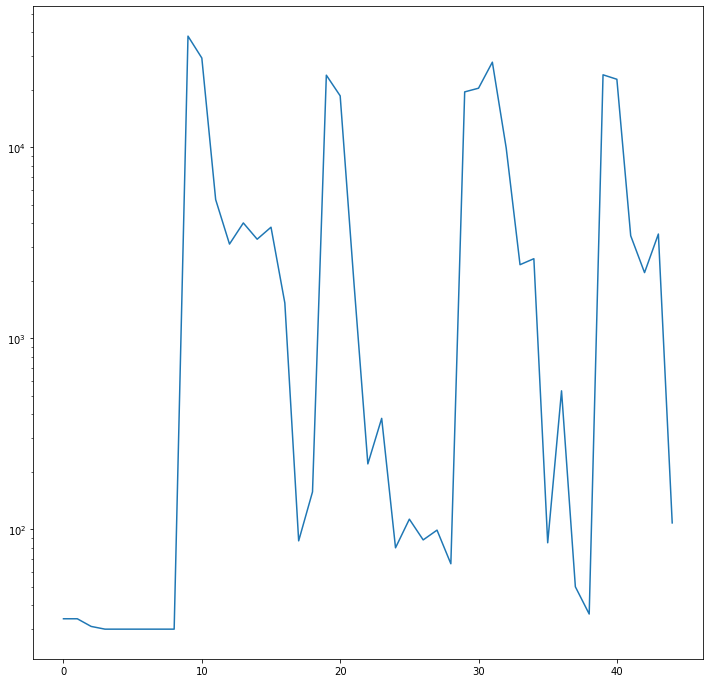

In [4]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 45

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]

RL.rl_init(env_info, agent_info)


#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        index = episode//10 -1
        RL.rl_change_task(reward_states=[reward_states[index]])
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

  0%|          | 0/45 [00:00<?, ?it/s]

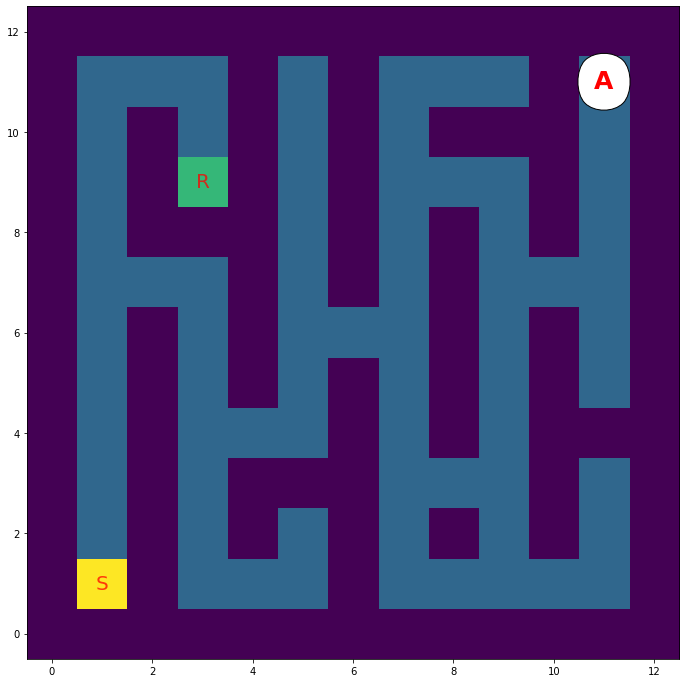

 33%|███▎      | 15/45 [00:01<00:02, 11.43it/s]

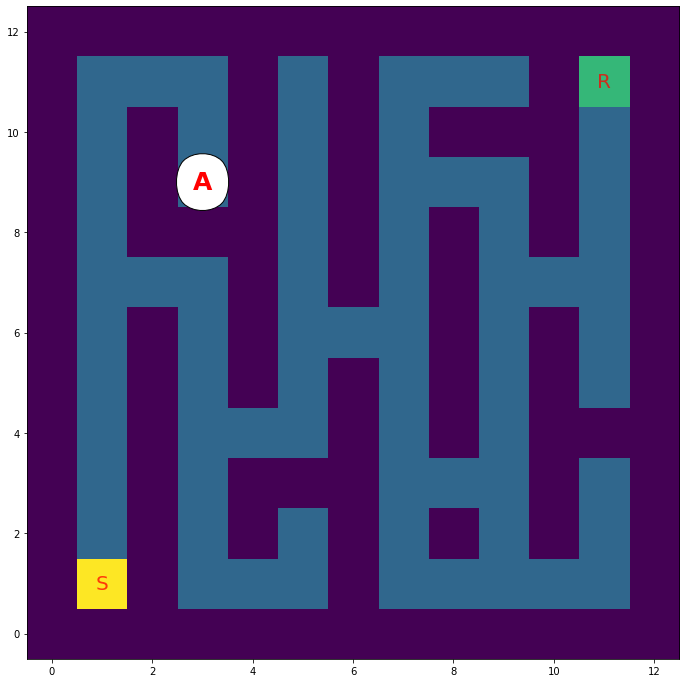

 60%|██████    | 27/45 [00:01<00:00, 19.75it/s]

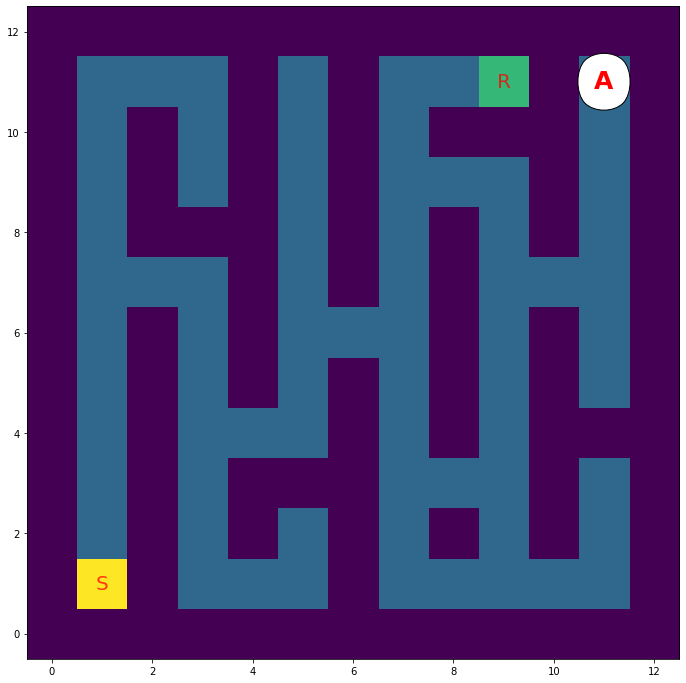

 71%|███████   | 32/45 [00:02<00:01, 12.45it/s]

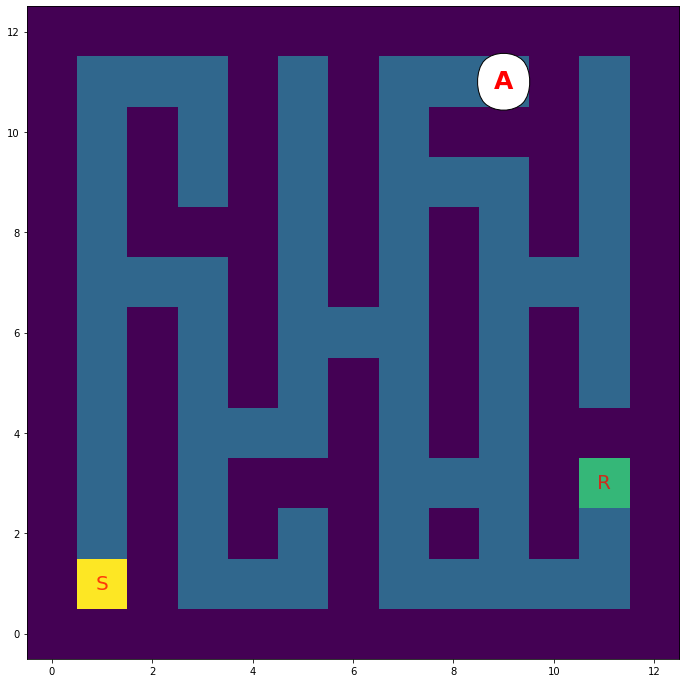

100%|██████████| 45/45 [00:03<00:00, 13.10it/s]


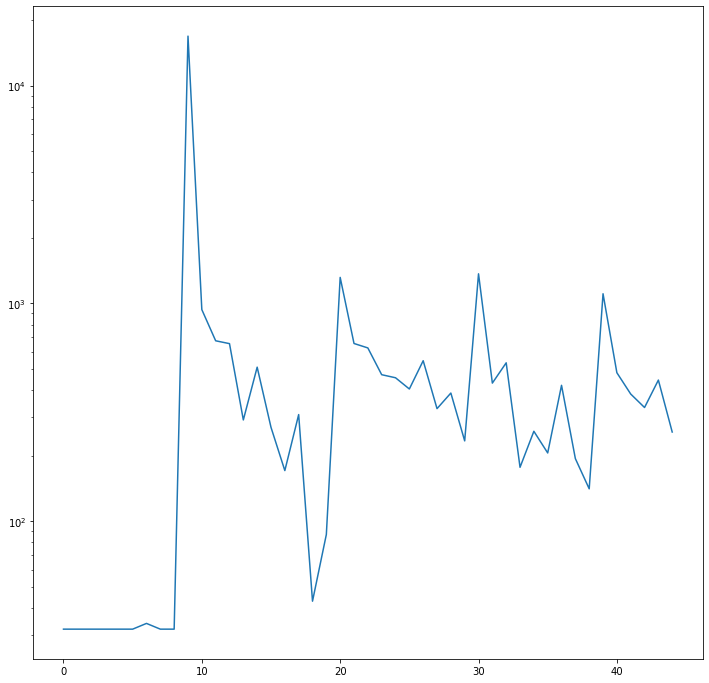

In [67]:
RL = ReinforcementLearning(Maze, QAgent)

NUM_EPISODES = 45

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]

RL.rl_init(env_info, agent_info)


#Latent learning
NUM_EXPLORATION_STEPS= 500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        index = episode//10 -1
        RL.rl_change_task(reward_states=[reward_states[index]])
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

## Explore the SR matrix

In [14]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

RL.rl_init(env_info, agent_info)

In [16]:
#Get optimal path through maze

for _ in tqdm(range(1000)):
    RL.rl_episode()
    
optimal_trajectory = RL.trajectory

100%|██████████| 1000/1000 [00:06<00:00, 155.52it/s]


In [26]:
def record_trials(title="SR", optimal_trajectory=None):
    """
    This function records the SR in each state the agent enters during an epoch. 
    Params:
        title -- string, name of the resulting file
        optimal_trajectory -- list[int], simulates path of the agent
    """
    metadata = dict(title=title, artist='JG')
    writer = manimation.FFMpegFileWriter(fps=15, metadata=metadata)
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.tight_layout()

    RL.rl_change_epsilon(0)  # Fully greedy for recording
    
    with writer.saving(fig, f"./out/{title}.mp4", 144):
        if optimal_trajectory: #Manually follow optimal trajectory
            for state in optimal_trajectory:
                plt.imshow(RL.agent.M[state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()
        
        else: #Run experiment
            reward, state, action, termination = RL.rl_start()
            while not termination:
                reward, state, action, termination = RL.rl_step(reward, state, action)
                plt.imshow(RL.agent.M[state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()

100%|██████████| 100/100 [00:34<00:00,  2.87it/s]


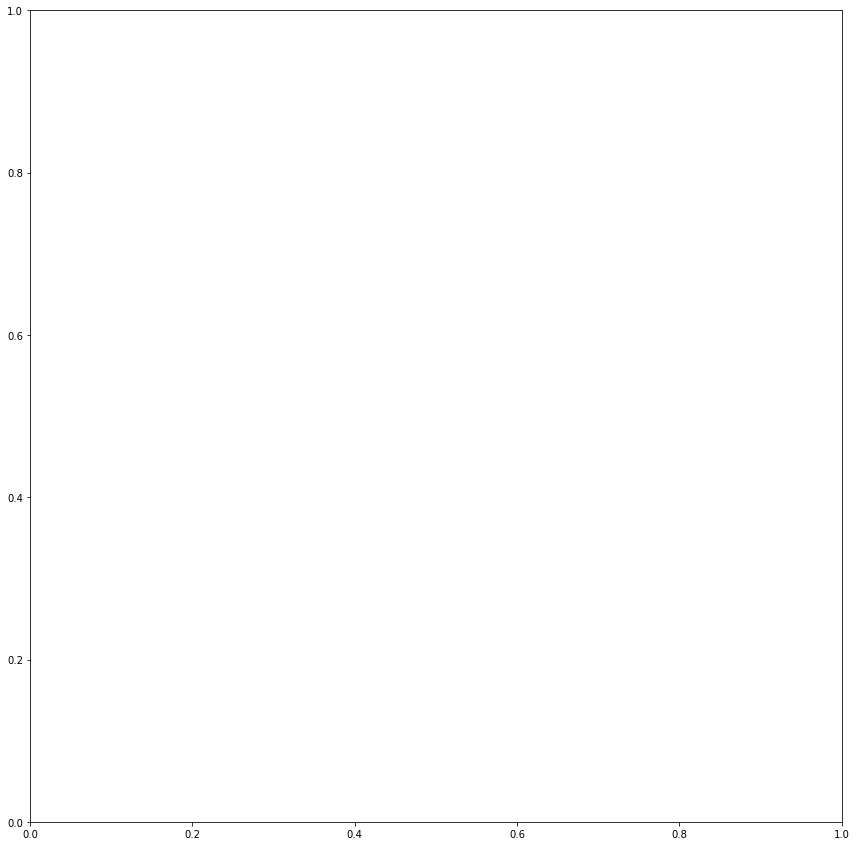

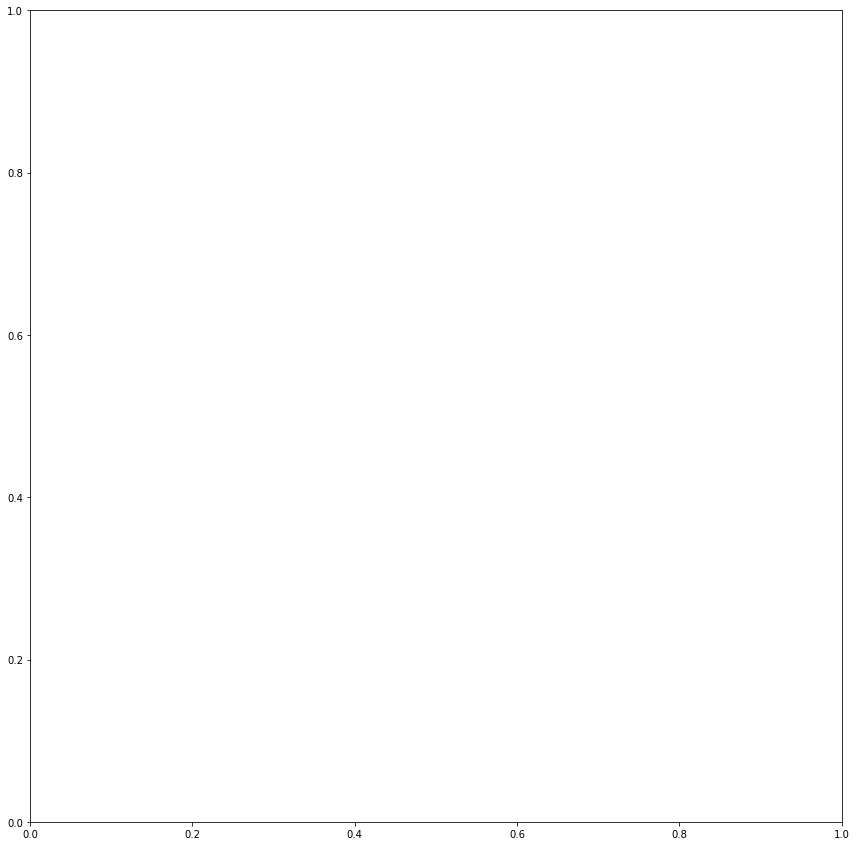

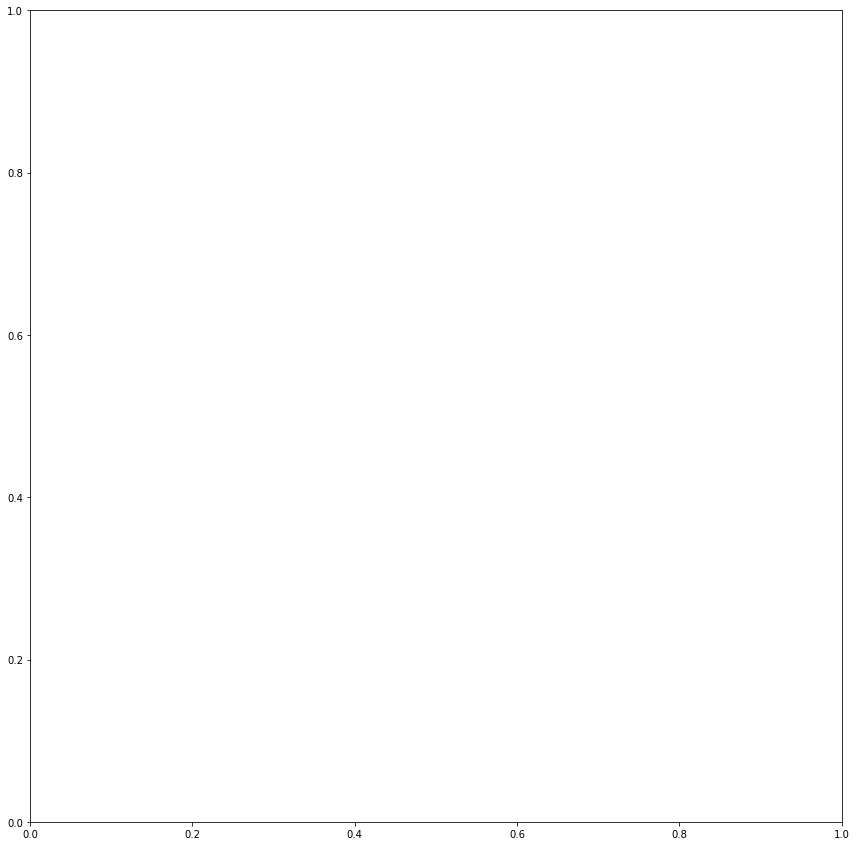

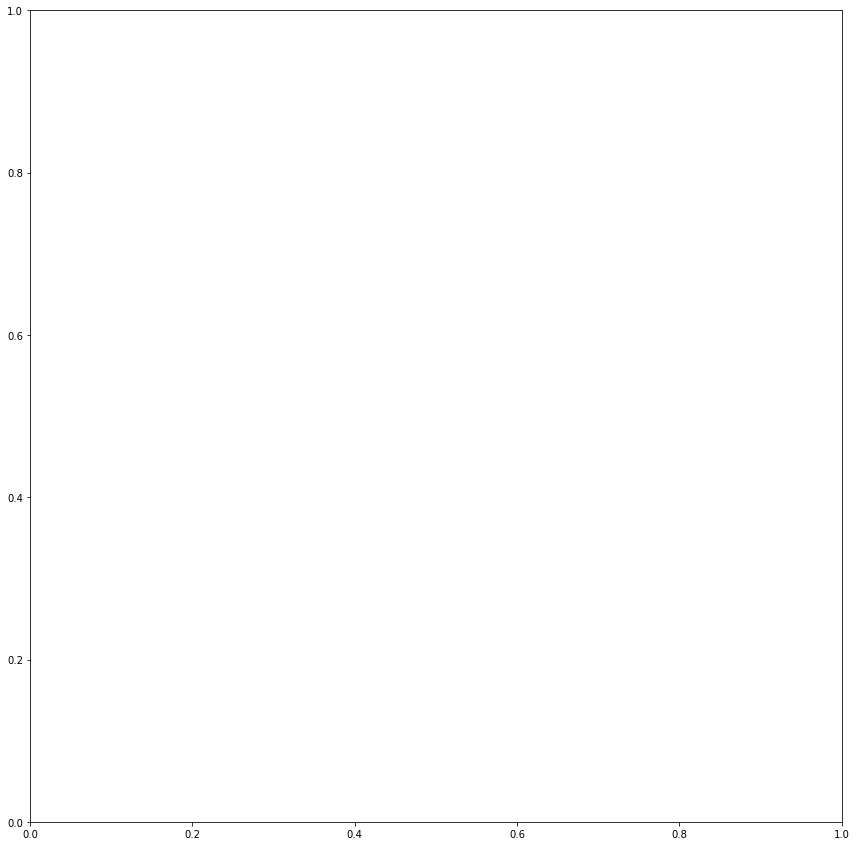

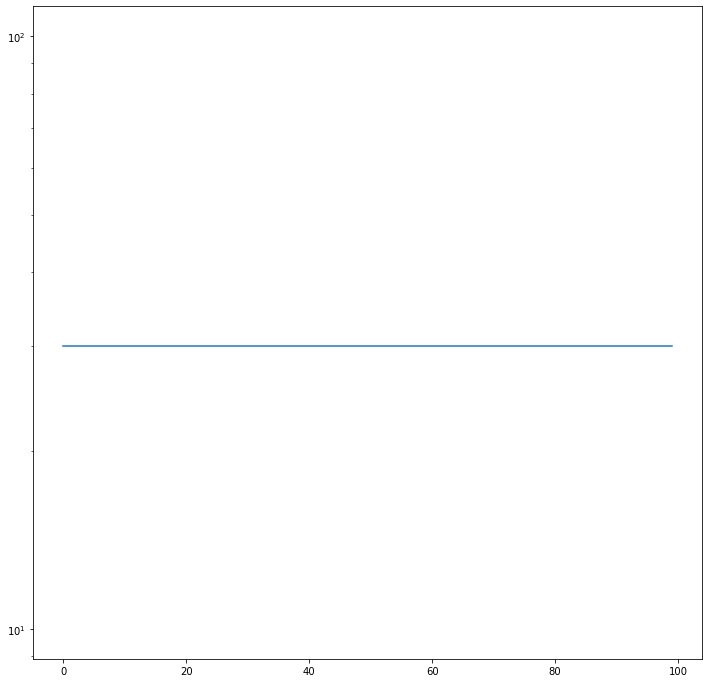

In [30]:
#Save the SR for different times
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 100
num_steps = []

RL.rl_init(env_info, agent_info)

#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
record_trials("SR_exploration", optimal_trajectory)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    if episode==1:
        record_trials("SR_trial_1", optimal_trajectory)
        
    if episode==10:
        record_trials("SR_trial_10", optimal_trajectory)
        
    if episode==100:
        record_trials("SR_trial_100", optimal_trajectory)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()